## Gráficos A.3

Ya con el Log llamado `log_central`, procedemos a crear los gráficos solicitados.

Primero, importamos las librerias necesarias para visualizar la información.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Ahora vamos a definir las columnas del Log. (nosotros sabemos cuales son, dado que salen en las intrucciones del PDF), pero debemos definirlas para el programa. (falta rango etario)

In [2]:
columnas_presentes = [
    "timestamp ini",
    "timestamp fin",
    "máquina",
    "tipo de máquina",
    "query búsqueda",
    "tiempo fin",
    "score obtenido"
]

vamos a leer el Log como un DataFrame en forma de CSV, aún cuando en realidad es un TXT.

In [3]:
df = pd.read_csv("log_central.txt", sep=",", names=columnas_presentes)

Mostramos las primeras 5 filas del data frame para visualizar de manera mas clara la información.

In [4]:
df.head()

,timestamp ini,timestamp fin,máquina,tipo de máquina,query búsqueda,tiempo fin,score obtenido
0,2025-05-10T12:44:13.101819,2025-05-10T12:44:13.104934,1,libro,a la tesis,3.11,2
1,2025-05-10T12:44:44.120655,2025-05-10T12:44:44.122722,1,libro,{'libro'},2.00,3
2,2025-05-10T14:42:45.951036,2025-05-10T14:42:45.963798,4,articulo,{'articulo'},12.77,3
3,2025-05-10T14:42:45.920777,2025-05-10T14:42:45.933378,2,tesis,{'tesis'},12.61,3
4,2025-05-10T14:42:45.850804,2025-05-10T14:42:45.869809,1,libro,{'libro'},19.01,3


Ya con el data frame cargado correctamente, vamos a convertir las fechas de texto`timestamp ini` y `timestamp fin` a un formato adecuado para análisis y manipulación de fechas y horas en Python.

In [5]:
df["timestamp ini"] = pd.to_datetime(df["timestamp ini"])
df["timestamp fin"] = pd.to_datetime(df["timestamp fin"])

Ahora, visualizamos de nuevo las 5 primeras columnas, para verificar que todo ande bien.

In [6]:
df.head()

,timestamp ini,timestamp fin,máquina,tipo de máquina,query búsqueda,tiempo fin,score obtenido
0,2025-05-10 12:44:13.101819,2025-05-10 12:44:13.104934,1,libro,a la tesis,3.11,2
1,2025-05-10 12:44:44.120655,2025-05-10 12:44:44.122722,1,libro,{'libro'},2.00,3
2,2025-05-10 14:42:45.951036,2025-05-10 14:42:45.963798,4,articulo,{'articulo'},12.77,3
3,2025-05-10 14:42:45.920777,2025-05-10 14:42:45.933378,2,tesis,{'tesis'},12.61,3
4,2025-05-10 14:42:45.850804,2025-05-10 14:42:45.869809,1,libro,{'libro'},19.01,3


## Ya con todo cargado, procedemos a responder las preguntas planteadas.

### Pregunta 1: Gráfico de torta con porcentaje de consulta por rango etario.

In [7]:
# Pendiente, falta esa columna

### Pregunta 2: Curvas de los promedios de score a través del tiempo, utilizar tamaños de ventana variable.

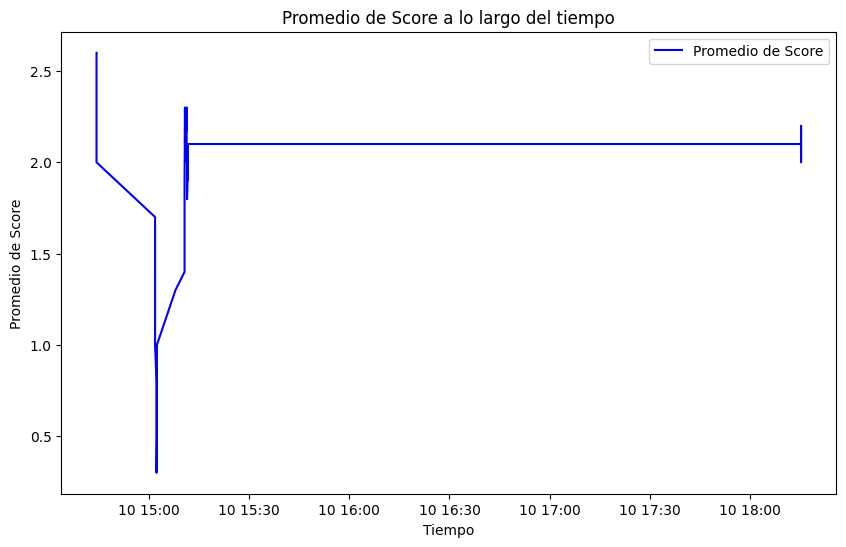

In [8]:
# Calcular el promedio del score con una ventana deslizante
window_size = 10  # Puedes cambiar el tamaño de la ventana
scores = df['score obtenido']
time = df['timestamp ini']

rolling_avg = scores.rolling(window=window_size).mean()

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(time, rolling_avg, label='Promedio de Score', color='blue')
plt.xlabel('Tiempo')
plt.ylabel('Promedio de Score')
plt.title('Promedio de Score a lo largo del tiempo')
plt.legend()
plt.show()

### Pregunta 3: Gráfico de cajas destacando los tiempos promedio, min, max por esclavo.

<Figure size 1000x600 with 0 Axes>

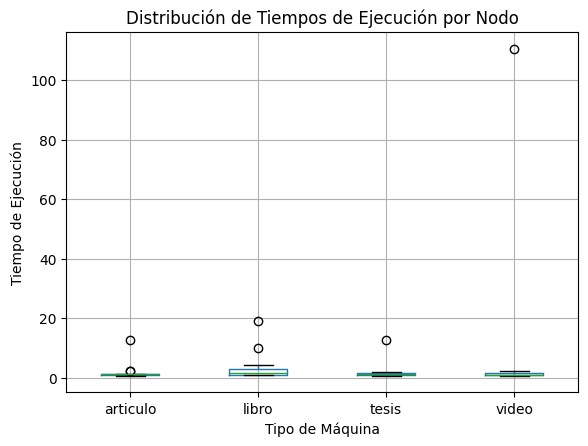

In [9]:
# Agrupar por tipo de máquina (maestro, esclavo)
grouped = df.groupby('tipo de máquina')['tiempo fin'].describe()

# Graficar caja de los tiempos
plt.figure(figsize=(10, 6))
df.boxplot(column='tiempo fin', by='tipo de máquina')
plt.title('Distribución de Tiempos de Ejecución por Nodo')
plt.suptitle('')
plt.xlabel('Tipo de Máquina')
plt.ylabel('Tiempo de Ejecución')
plt.show()

### Pregunta 4: Latencia de red entre el maestro y los esclavos

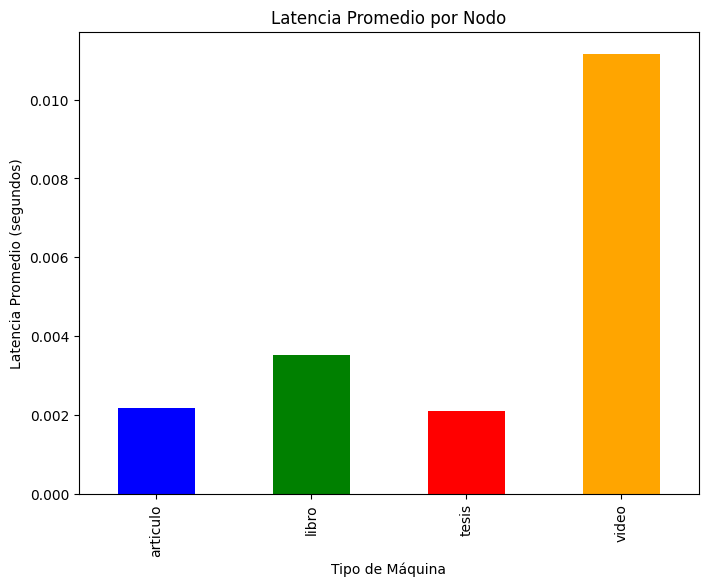

In [10]:
# Calcular latencia
df['latencia'] = (pd.to_datetime(df['timestamp fin']) - pd.to_datetime(df['timestamp ini'])).dt.total_seconds()

# Agrupar por tipo de máquina (maestro, esclavo) y calcular latencia promedio
latency = df.groupby('tipo de máquina')['latencia'].mean()

# Graficar latencia
plt.figure(figsize=(8, 6))
latency.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])
plt.title('Latencia Promedio por Nodo')
plt.xlabel('Tipo de Máquina')
plt.ylabel('Latencia Promedio (segundos)')
plt.show()

### Pregunta 5: Tamaño en MB de las respuestas por hora a través del día, indicando el día.

In [11]:
# Para fernandosky